# 2D Design Template

# Overview

The purpose of this project is for you to apply what you have learnt in this course. This includes working with data and visualizing it, create model of linear regression, as well as using metrics to measure the accuracy of your model. 

Please find the project handout description in the following [link](https://edimension.sutd.edu.sg/webapps/blackboard/content/listContent.jsp?course_id=_5582_1&content_id=_200537_1).


## Deliverables

You need to submit this Jupyter notebook together with the dataset into Vocareum. Use the template in this notebook to work on this project. You are free to edit or add more cells if needed

## Students Submission
*Include a short sentence summarizing each member’s contribution.*

Student's Name:
- Ng Zhan Kang: Did the bonus streamlit website.
- Teh Wu Rui: Did the exploratory data analysis of the dataset.
- Randy Soh: Did the cleaning of the dataset for analysis.
- Daniel Parsaulian Napitu: Helped look for the dataset.

### Problem Statement

- Background description of the problem

Household energy consumption is a major contributor to overall energy demand and environmental impact. With the growing adoption of electronic appliances, heating, ventilation, and air conditioning (HVAC) systems, as well as lighting and other utilities, understanding what is the main factor behind energy use at a household level is of great importance. By applying data-driven analysis and multi-linear regression, we can uncover insights into these patterns and help households and policymakers make informed decisions to promote more efficient energy usage and sustainable living.

## Persona Analysis: Understanding Household Energy Users

### Persona 1: Sarah – White Collar Worker
- **Age**: 35  
- **Occupation**: Marketing Executive  
- **Household Type**: Lives in a 3-bedroom apartment with partner and child  
- **Pain Points**:
  - High electricity bills despite moderate appliance usage
  - Uncertainty about which devices consume the most energy
  - No time to track energy usage manually
  - Wants to be more sustainable but lacks clear guidance

---

### Persona 2: Mark – Stay-At-Home Worker
- **Age**: 29  
- **Occupation**: Software Developer (works from home)  
- **Household Type**: Lives alone in a 1-bedroom flat  
- **Pain Points**:
  - HVAC usage is high due to being home all day
  - Finds it hard to optimise energy usage based on daily schedule
  - Wants to reduce environmental impact but is unsure where to start
  - Limited visibility on energy consumption by time of day

---

### Persona 3: Maple – Retired Senior
- **Age**: 68  
- **Occupation**: Retired teacher  
- **Household Type**: Lives with spouse in a small home  
- **Pain Points**:
  - Struggles to understand complex energy usage reports
  - Feels energy-saving technologies are too technical
  - Sensitive to indoor temperature, especially in extreme weather
  - Wants simple advice on reducing usage without sacrificing comfort

---

### Key Insights:
- Users want **better visibility and control** over their energy consumption.
- Many have the **desire to reduce energy use** but face knowledge and time barriers.
- Customised recommendations and predictions can help address these diverse needs.

# <u>Problem Statement</u>
    
**How might we** use household-level data to build an accurate model that predicts household energy consumption, in order to support data-driven decision-making for energy efficiency?

### Dataset

- Describe your dataset.
- Put the link to the sources of your raw dataset.
- Put python codes for loading the data into pandas dataframe(s). The data should be the raw data downloaded from the source. No pre-processing using any software (excel, python, etc) yet. Include this dataset in your submission
- Explain each column of your dataset (can use comment or markdown)
- State which column is the dependent variable (target) and explain how it is related to your problem statement
- State which columns are the independent variables (features) and describe your hypothesis on why these features can predict the target variable

In [1]:
# Suppress Future Warnings
import warnings
warnings.filterwarnings('ignore')

from typing import TypeAlias
from typing import Optional, Any    
Number: TypeAlias = int | float

# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# read the dataset
df: pd.DataFrame = pd.read_csv('./data/Energy_Consumption.csv')

df.head(5)

,Timestamp,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,DayOfWeek,Holiday,EnergyConsumption
0,2022-01-01 00:00:00,25.139433,43.431581,1565.693999,5,On,Off,2.774699,Monday,No,75.364373
1,2022-01-01 01:00:00,27.731651,54.225919,1411.064918,1,On,On,21.831384,Saturday,No,83.401855
2,2022-01-01 02:00:00,28.704277,58.907658,1755.715009,2,Off,Off,6.764672,Sunday,No,78.270888
3,2022-01-01 03:00:00,20.080469,50.371637,1452.316318,1,Off,On,8.623447,Wednesday,No,56.519850
4,2022-01-01 04:00:00,23.097359,51.401421,1094.130359,9,On,Off,3.071969,Friday,No,70.811732


## About the Dataset
This dataset contains a comprehensive set of variables, including temperature, humidity, occupancy levels, HVAC and lighting usage, renewable energy generation, among others. Each record captures a specific moment in time, offering a detailed view of the simulated environment’s conditions. The dataset is constructed to closely resemble energy consumption scenarios that might be encountered in real life, making it valuable for examining the factors that drive energy use. It is well-suited for activities such as exploratory data analysis and the development of predictive models, providing ample opportunity to investigate and understand the various influences on energy consumption.

For more information, visit the source of the dataset [at kaggle.](https://www.kaggle.com/datasets/mrsimple07/energy-consumption-prediction)

### Variables
- `Timestamp` - The chronological record of each data point, providing a time-based context.
- `Temperature` - Randomly generated values representing ambient temperatures in degrees Celsius.
- `Humidity` - Randomly generated values reflecting the humidity level as a percentage.
- `SquareFootage` - Simulated values representing the size of the environment in square footage.
- `Occupancy` - Randomly generated integer values indicating the number of occupants.
- `HVACUsage` - Categorical variable denoting the HVAC system's operational state ('On' or 'Off').
- `LightingUsage` - Categorical variable indicating the lighting system's operational state ('On' or 'Off').
- `RenewableEnergy` - Randomly generated values representing the contribution of renewable energy sources as a percentage.
- `DayOfWeek` - Categorical variable indicating the day of the week.
- `Holiday` - Categorical variable denoting whether the day is a holiday ('Yes' or 'No')
- `EnergyConsumption` - How much energy was actually consumed. This is in kWh.

### Dependent Variable: `EnergyConsumption`
The dependent variable in this dataset is EnergyConsumption. This column represents the amount of energy used in the observed environment during each recorded time interval. Our primary goal is to model and predict this energy consumption based on various influencing factors such as temperature, humidity, occupancy, HVAC usage, and renewable energy input.

The problem statement focuses on understanding and forecasting energy consumption patterns. Since these patterns depend on environmental conditions and occupant behavior, EnergyConsumption naturally serves as the target variable. By predicting it accurately, we can optimize energy usage, improve efficiency, and reduce costs.

Thus, EnergyConsumption is the target variable because it quantifies the outcome we aim to estimate or explain in the context of energy management and sustainability. The other features act as independent variables (predictors), providing the context and inputs necessary for building predictive models.

### Independent Variables: `Temperature`, `Humidity`, `Occupancy`, `HVACUsage`, `LightingUsage`, `RenewableEnergy`, `DayOfWeek`, `Holiday`, `SquareFootage`
These independent variables were chosen because each one represents a logical component that can influence energy consumption. By including environmental, behavioral, operational, and temporal features, my analysis aims to identify which factors have the most significant impact. This, in turn, guides efforts to develop targeted strategies for reducing household energy demand, as outlined in my problem statement.

In summary, these variables serve as the model's inputs, providing the explanatory context needed to understand and predict variations in household energy use.

### Clean & Analyze your data
Use python code to:
- Clean your data
- Calculate Descriptive Statistics and other statistical analysis
- Visualization with meaningful analysis description

In [3]:
df.head(5)

,Timestamp,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,DayOfWeek,Holiday,EnergyConsumption
0,2022-01-01 00:00:00,25.139433,43.431581,1565.693999,5,On,Off,2.774699,Monday,No,75.364373
1,2022-01-01 01:00:00,27.731651,54.225919,1411.064918,1,On,On,21.831384,Saturday,No,83.401855
2,2022-01-01 02:00:00,28.704277,58.907658,1755.715009,2,Off,Off,6.764672,Sunday,No,78.270888
3,2022-01-01 03:00:00,20.080469,50.371637,1452.316318,1,Off,On,8.623447,Wednesday,No,56.519850
4,2022-01-01 04:00:00,23.097359,51.401421,1094.130359,9,On,Off,3.071969,Friday,No,70.811732


<div class="alert alert-block alert-info">
<b>Observation:</b> From here you can see that our Numerical datas are "Temperature", "Humidity", "SquareFootage", "Renewable Energy", "EnergyConsumption"<br>
    The categorical datas are "Occupancy", "HVACUsage", "Lighting Usage", "Day Of Week", "Holiday".
</div>

In [4]:
# notice that there are some columns represented not in numeric values, so we need to encode them before we continue
# remove timestamp as we do not need it here for our analysis

df = df.drop(columns='Timestamp')

In [5]:
# now we move on to categorical features
# we shall split days of the weeks into weekdays and weekends for easier data analysis and to reduce risk of overfitting on marginal daily effects

df['Weekend_Yes'] = df['DayOfWeek'].isin(['Saturday', 'Sunday']).astype(int) # astype is used here to change bool values to 0 and 1
df = df.drop(columns='DayOfWeek')

In [6]:
# To use categorical variables in a linear regression model, we need to convert them into numerical values because linear regression only works with numeric input.
# This process is called one-hot encoding.

# get_dummies() turns categories into 0s and 1s, enabling our multi-linear regression model to work with categorical data.
# drop_first=True is used as an argument here for linear models to avoid redundant columns.
df = pd.get_dummies(df, columns=['HVACUsage', 'LightingUsage', 'Holiday'], drop_first=True).astype(int)

<div class="alert alert-block alert-info">
<b>Note:</b> We did one-hot encoding for catergorical variables as multi-linear regression model requires numeric variables and cannot properly interprete label-encoded integers for unordered categories (it treats them as intervals and introduces false ordinality). One-hot encoding avoids false assumptions about order and lets the model assign separate weights to each category.
</div>

In [7]:
df.head(5)

,Temperature,Humidity,SquareFootage,Occupancy,RenewableEnergy,EnergyConsumption,Weekend_Yes,HVACUsage_On,LightingUsage_On,Holiday_Yes
0,25,43,1565,5,2,75,0,1,0,0
1,27,54,1411,1,21,83,1,1,1,0
2,28,58,1755,2,6,78,1,0,0,0
3,20,50,1452,1,8,56,0,0,1,0
4,23,51,1094,9,3,70,0,1,0,0


In [8]:
# understanding dtypes of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Temperature        1000 non-null   int64
 1   Humidity           1000 non-null   int64
 2   SquareFootage      1000 non-null   int64
 3   Occupancy          1000 non-null   int64
 4   RenewableEnergy    1000 non-null   int64
 5   EnergyConsumption  1000 non-null   int64
 6   Weekend_Yes        1000 non-null   int64
 7   HVACUsage_On       1000 non-null   int64
 8   LightingUsage_On   1000 non-null   int64
 9   Holiday_Yes        1000 non-null   int64
dtypes: int64(10)
memory usage: 78.2 KB


In [9]:
# print the columns and the shape
print("Columns Names:", df.columns)
print("------------------")
print("No of Rows: ", df.shape[0])
print("No of Cols: ", df.shape[1])

Columns Names: Index(['Temperature', 'Humidity', 'SquareFootage', 'Occupancy',
       'RenewableEnergy', 'EnergyConsumption', 'Weekend_Yes', 'HVACUsage_On',
       'LightingUsage_On', 'Holiday_Yes'],
      dtype='object')
------------------
No of Rows:  1000
No of Cols:  10


In [10]:
# check if there is any null counts, and if there is consider dropping
df.isnull().sum()

Temperature          0
Humidity             0
SquareFootage        0
Occupancy            0
RenewableEnergy      0
EnergyConsumption    0
Weekend_Yes          0
HVACUsage_On         0
LightingUsage_On     0
Holiday_Yes          0
dtype: int64

In [11]:
# begin with the analysis of numerical data in dataset
# check if there are any duplicate rows
print(df.duplicated().sum())

0


<div class="alert alert-block alert-info">
<b>Note:</b> There is no missing data in our dataset, and there is no Na, or NaN data in our dataset. We can then proceed to use plots to visualise our dataset.
</div>

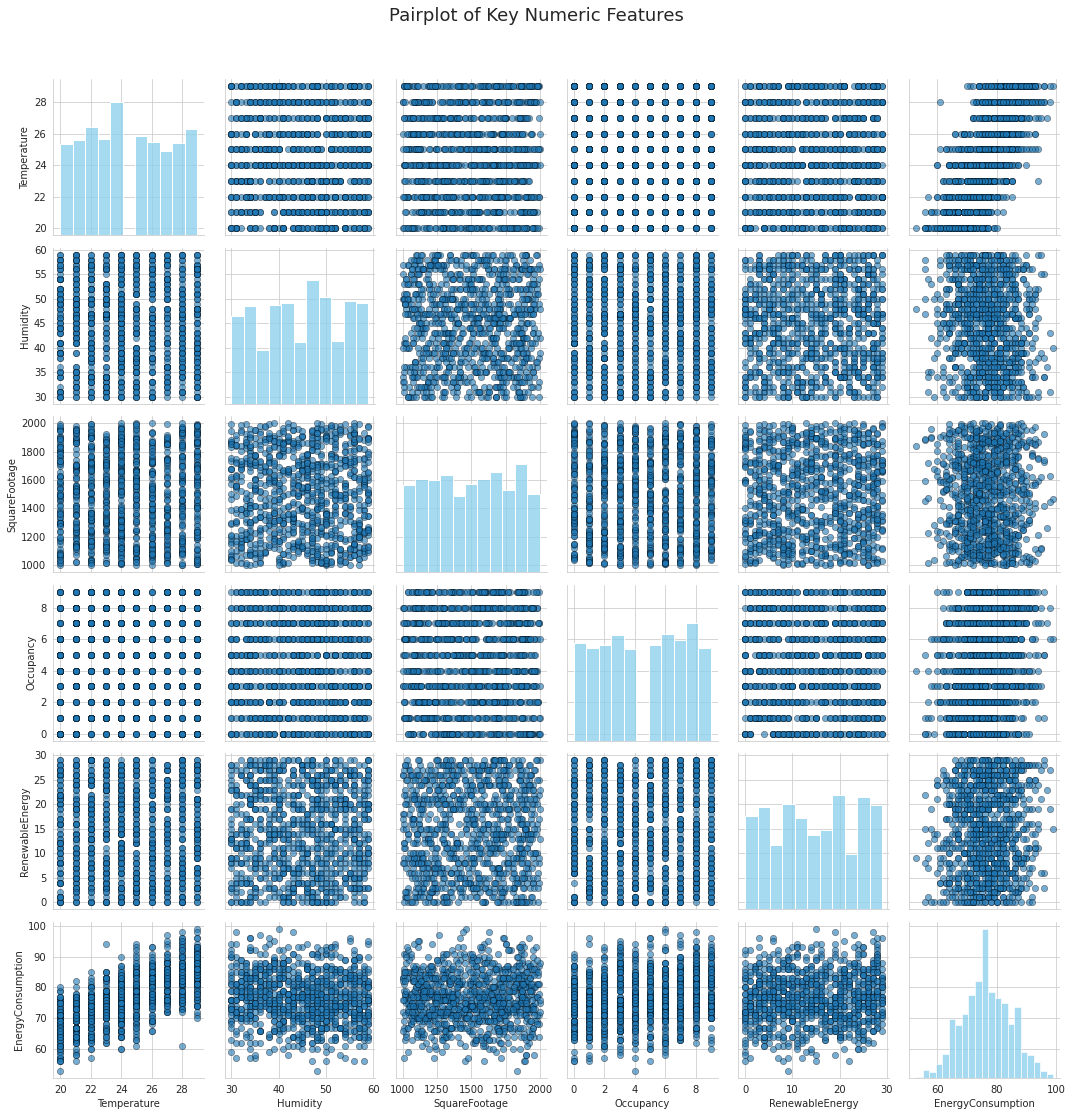

In [12]:
# plot a pairplot to visualise the relationship between our numerical data
sns.set_style('whitegrid')

g = sns.pairplot(
    df[['Temperature', 'Humidity', 'SquareFootage', 'Occupancy', 'RenewableEnergy', 'EnergyConsumption']],
    plot_kws={'alpha': 0.6, 's': 40, 'edgecolor': 'k'},
    diag_kws={'color': 'skyblue', 'fill': True}
)

plt.suptitle('Pairplot of Key Numeric Features', fontsize=18, y=1.03)
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-info">
<b>Note:</b> We can see that as temperature increases, energy consumption tends to increase.
</div>

In [13]:
# confirm if there is high correlation between temperature and energy consumption

df[['Temperature', 'EnergyConsumption']].corr()

,Temperature,EnergyConsumption
Temperature,1.000000,0.686954
EnergyConsumption,0.686954,1.000000


In [14]:
# we want to see if there is any relation between temperature and humidity

df[['Temperature', 'Humidity']].corr()

,Temperature,Humidity
Temperature,1.000000,-0.036367
Humidity,-0.036367,1.000000


<div class="alert alert-block alert-info">
<b>Observation:</b> We note that there is no distinct correlation in this dataset, hence we can include both variables in our multi-regression model.
</div>

In [15]:
# see unique values of occupancy

df.Occupancy.unique()

array([5, 1, 2, 9, 6, 8, 0, 4, 3, 7])

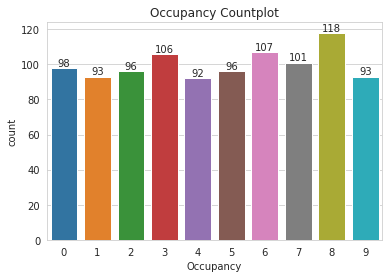

In [16]:
# countplots for occupancy to check for any anomolies

ax = sns.countplot(data=df, x="Occupancy")
plt.title('Occupancy Countplot')

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')
    
plt.show()

<div class="alert alert-block alert-info">
<b>Observation:</b> Notice that there the occupancy is relatively even out and there is not really a distinct bump/anomalie. One takeaway however is that occupancy of 8 is one of the highest.
</div>

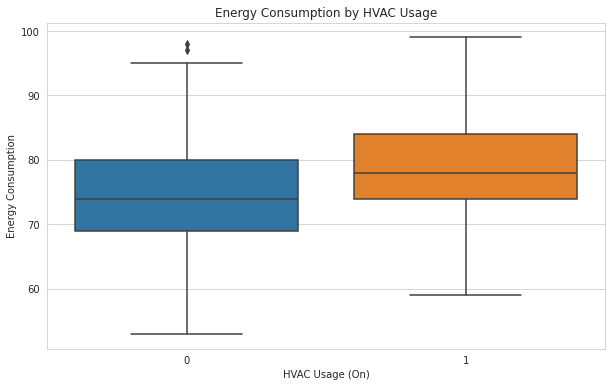

In [17]:
# now we want to see the boxplot of HVAC usage vs energy consumption

plt.figure(figsize=(10, 6))
sns.boxplot(x='HVACUsage_On', y='EnergyConsumption', data=df)
plt.title('Energy Consumption by HVAC Usage')
plt.xlabel('HVAC Usage (On)')
plt.ylabel('Energy Consumption')
plt.show()

<div class="alert alert-block alert-info">
<b>Observation:</b><br>
Higher Median: When HVAC is on (True), the median energy consumption is higher than when HVAC is off. This suggests that operating the HVAC system leads to increased overall energy use.

Distribution: The range (interquartile range and whiskers) of energy consumption values is also slightly higher when HVAC is on, indicating more variability in consumption in those cases.

Outliers: There are a few outliers (dots) on the higher end of energy consumption when HVAC is off, but overall the box for HVAC on is centered higher.

Spread: Both categories have overlapping whiskers, but "HVAC On" is generally shifted up, reinforcing that HVAC usage is a significant driver of energy usage.

Interpretation:
Turning on the HVAC system raises average energy consumption and potentially its variability.

Energy management strategies may benefit from focusing on HVAC usage, as it has a clear and measurable impact on consumption levels.
</div>

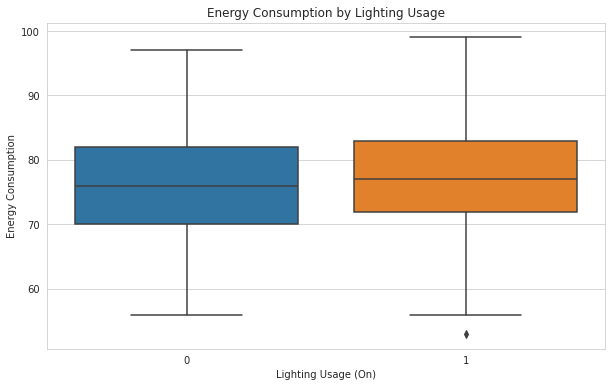

In [18]:
# we do the same for lighting usage vs energy consumption

plt.figure(figsize=(10, 6))
sns.boxplot(x='LightingUsage_On', y='EnergyConsumption', data=df)
plt.title('Energy Consumption by Lighting Usage')
plt.xlabel('Lighting Usage (On)')
plt.ylabel('Energy Consumption')
plt.show()

<div class="alert alert-block alert-info">
<b>Observation:</b><br>
The observation here is similar to what we have observed for HVAC usage, where when lighting is on, the median energy consumption is higher than when lighting is off. This leads to the same conclusion we got for HVAC where operating the lighting system leads to increased overall energy use and energy management strategies may benefit from focusing on lighting usage as well, as it has a clear and measurable impact on consumption levels.
</div>

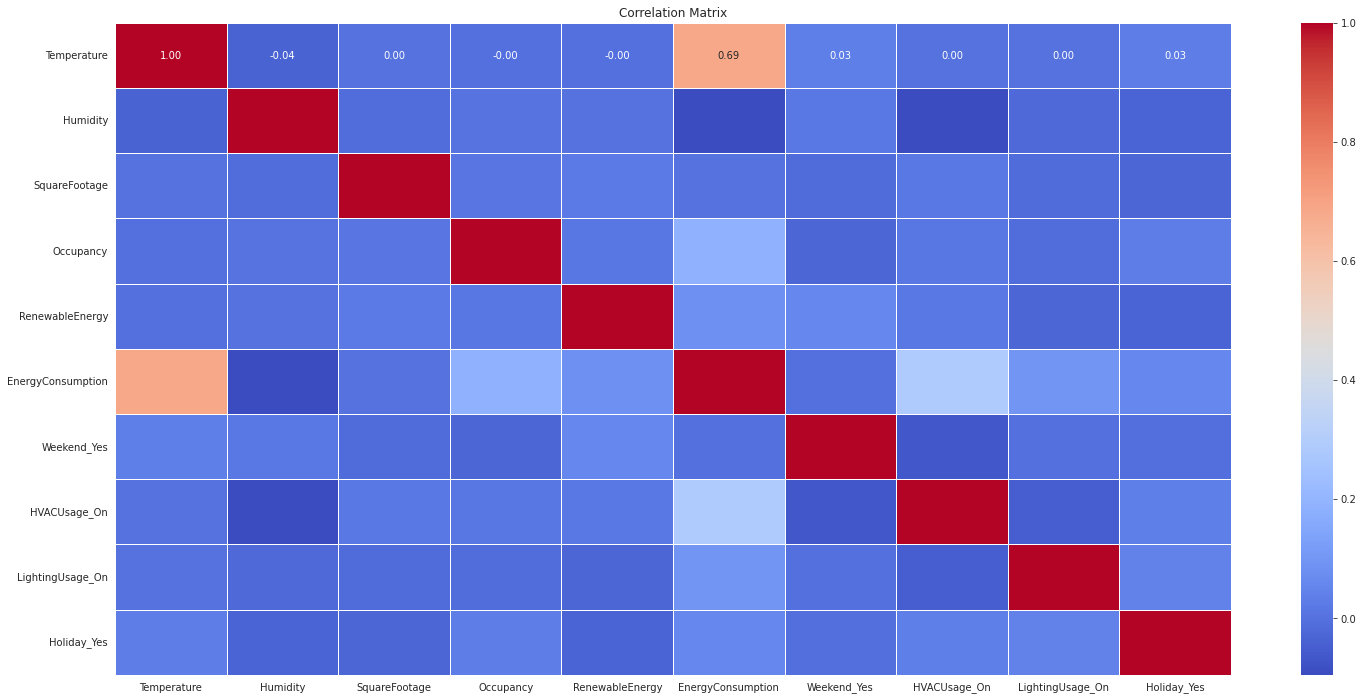

In [19]:
# plot a correlation matrix to see which one has the highest correlation
correlationMatrix = df.corr()

plt.figure(figsize=(25, 12))
sns.heatmap(correlationMatrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

<div class="alert alert-block alert-info">
<b>Observation:</b> We can see that `EnergyConsumption` has the highest correlation to `Temperature` as shaded in orange in the correlation matrix, where the others are spreaded around the matrix score of -0.2 to 0.2, which correlates to our earlier observation.
</div>

### Features and Target Preparation

Prepare features and target for model training.

In [20]:
# finding the columns in our dataset

df.columns

Index(['Temperature', 'Humidity', 'SquareFootage', 'Occupancy',
       'RenewableEnergy', 'EnergyConsumption', 'Weekend_Yes', 'HVACUsage_On',
       'LightingUsage_On', 'Holiday_Yes'],
      dtype='object')

In [21]:
# function to help with getting our independent and dependent variables from our dataset
def get_features_targets(df, feature_names, target_names):
    df_feature = df.loc[:, feature_names] # running df.loc function to get columns for feature factors from dataset
    df_target = df.loc[:, target_names] # running df.loc function to get the column for target factor (energy consumption)
    return df_feature, df_target

In [22]:
columns = [column for column in df.columns if column != 'EnergyConsumption'] # gets list of columns that exclude EnergyConsumption column as that is our target

df_feature, df_target = get_features_targets(df, columns, ["EnergyConsumption"])

display(df_feature)
display(df_target)

,Temperature,Humidity,SquareFootage,Occupancy,RenewableEnergy,Weekend_Yes,HVACUsage_On,LightingUsage_On,Holiday_Yes
0,25,43,1565,5,2,0,1,0,0
1,27,54,1411,1,21,1,1,1,0
2,28,58,1755,2,6,1,0,0,0
3,20,50,1452,1,8,0,0,1,0
4,23,51,1094,9,3,0,1,0,0
...,...,...,...,...,...,...,...,...,...
995,28,48,1080,5,21,1,0,0,0
996,23,47,1705,4,25,0,0,1,1
997,23,48,1320,6,0,0,0,1,1
998,25,31,1309,3,20,0,1,0,1


,EnergyConsumption
0,75
1,83
2,78
3,56
4,70
...,...
995,82
996,66
997,72
998,76


In [23]:
# understanding the size of our independent and dependent variables
print("Dependent Var Shape: ", df_feature.shape)
print("Independent Var Shape: ", df_target.shape)

Dependent Var Shape:  (1000, 9)
Independent Var Shape:  (1000, 1)


In [24]:
# randomly splits the dataset into training and testing sets depending on a random seed if specified and test size (default = 0.5)
def split_data(df_feature, df_target, random_state = None, test_size = 0.5):
    
    # sets a random seed so data will be split randomly based on a fixed seed instead of changing every time the code is run
    if random_state:
        np.random.seed(random_state)
        
    # indexing is the choice of data index values that we will be using for our test data
    indexing = np.random.choice(df_feature.index, size=int(test_size*df_feature.shape[0]), replace=False)
    
    # sorting out the test and train data with the help of loc and drop functions
    df_feature_test = df_feature.loc[indexing]
    df_feature_train = df_feature.drop(indexing)
    df_target_test = df_target.loc[indexing]
    df_target_train = df_target.drop(indexing)
    
    return df_feature_train, df_feature_test, df_target_train, df_target_test

In [25]:
# splitting our dataset accordingly
df_features_train, df_features_test, df_target_train, df_target_test = split_data(df_feature, df_target, random_state=100, test_size=0.3)

In [26]:
display(df_features_train.describe())
display(df_features_test.describe())
display(df_target_train.describe())
display(df_target_test.describe())

,Temperature,Humidity,SquareFootage,Occupancy,RenewableEnergy,Weekend_Yes,HVACUsage_On,LightingUsage_On,Holiday_Yes
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,24.528571,44.802857,1498.885714,4.604286,14.468571,0.302857,0.485714,0.490000,0.468571
std,2.798535,8.646184,286.097032,2.896742,8.695970,0.459823,0.500153,0.500257,0.499368
min,20.000000,30.000000,1004.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,37.750000,1251.500000,2.000000,7.000000,0.000000,0.000000,0.000000,0.000000
50%,24.000000,45.000000,1513.500000,5.000000,14.000000,0.000000,0.000000,0.000000,0.000000
75%,27.000000,52.000000,1735.250000,7.000000,22.000000,1.000000,1.000000,1.000000,1.000000
max,29.000000,59.000000,1999.000000,9.000000,29.000000,1.000000,1.000000,1.000000,1.000000


,Temperature,Humidity,SquareFootage,Occupancy,RenewableEnergy,Weekend_Yes,HVACUsage_On,LightingUsage_On,Holiday_Yes
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,24.356667,45.153333,1501.130000,4.526667,15.026667,0.283333,0.506667,0.493333,0.463333
std,2.896681,8.184525,294.212639,2.795593,8.840048,0.451370,0.500791,0.500791,0.499487
min,20.000000,30.000000,1000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,38.000000,1231.250000,2.000000,7.750000,0.000000,0.000000,0.000000,0.000000
50%,24.000000,46.000000,1488.500000,4.000000,15.000000,0.000000,1.000000,0.000000,0.000000
75%,27.000000,51.250000,1757.000000,7.000000,23.000000,1.000000,1.000000,1.000000,1.000000
max,29.000000,59.000000,1999.000000,9.000000,29.000000,1.000000,1.000000,1.000000,1.000000


,EnergyConsumption
count,700.000000
mean,76.491429
std,8.100491
min,53.000000
25%,71.000000
50%,76.000000
75%,82.000000
max,99.000000


,EnergyConsumption
count,300.000000
mean,76.716667
std,8.294923
min,57.000000
25%,71.000000
50%,77.000000
75%,83.000000
max,98.000000


In [27]:
#normalize using Z-score normalization
def normalize_z(array: np.ndarray, columns_means: Optional[np.ndarray]=None, 
                columns_stds: Optional[np.ndarray]=None) -> tuple[np.ndarray, np.ndarray, np.ndarray]:
 
    # ensures array is a numpy array and not anything else to prevent possible errors
    if isinstance(array, pd.Series):
        array = array.to_frame()
    if isinstance(array, (pd.Series, pd.DataFrame)):
        array = array.to_numpy()

    # ensures columns_means and columns_stds follows the same number of columns as the input array
    assert columns_means is None or columns_means.shape == (1, array.shape[1])
    assert columns_stds is None or columns_stds.shape == (1, array.shape[1])
    if columns_means is None:
        columns_means = array.mean(axis=0).reshape(1,-1)
    if columns_stds is None:
        columns_stds = array.std(axis=0).reshape(1,-1)
    
    # running the formula for Z-score nomalization
    out = (array-columns_means) / columns_stds
    
    assert out.shape == array.shape
    assert columns_means.shape == (1, array.shape[1])
    assert columns_stds.shape == (1, array.shape[1])
    
    return out, columns_means, columns_stds

In [28]:
# prepare features by adding a bias (intercept) term by adding a column of ones -> allows linear regression model to learn an intercept in future code
def prepare_feature(np_feature):
    ones = np.ones((np_feature.shape[0], 1))
    return np.concatenate((ones, np_feature), axis=1)

### Building Model

Use python code to build your model. Give explanation on this process.

In [29]:
# computes the linear regression prediction (X*beta)
def calc_linreg(X, beta):
    result = np.matmul(X, beta)
    assert result.shape == (X.shape[0], 1)
    return result

In [30]:
# computes the mean squared error (MSE) cost for linear regression
def compute_cost_linreg(X, y, beta) -> np.ndarray:
    yhat = calc_linreg(X, beta)
    matrix = yhat - y
    J = 1/(2*X.shape[0])*np.matmul(matrix.T, matrix)
    assert J.shape == (1, 1)
    return np.squeeze(J)

In [31]:
# trains a linear regression model using batch gradient descent -> repeatedly updates beta using gradient of cost function
def gradient_descent_linreg(X, y, beta, alpha, num_iters):
    storage = []
    for _ in range(num_iters):
        yhat = calc_linreg(X, beta)
        beta = beta - alpha*(1/X.shape[0])*np.matmul(X.T, yhat-y)
        storage.append(compute_cost_linreg(X, y, beta))
    J_storage = np.array(storage).reshape(-1, 1)
    assert beta.shape == (X.shape[1], 1)
    assert J_storage.shape == (num_iters, 1)
    return beta, J_storage

In [32]:
# predicts target for multi-linear regression model given input features and model parameters (beta, means, stds)
def predict_linreg(array_feature, beta, means = None, stds = None):
    
    assert means is None or means.shape == (1, array_feature.shape[1])
    assert stds is None or stds.shape == (1, array_feature.shape[1])
    
    feature = prepare_feature(normalize_z(array_feature, means, stds)[0])
    result = calc_linreg(feature, beta)
    
    assert result.shape == (array_feature.shape[0], 1)
    return result

In [33]:
# code for building the entire model for multi-linear regression

def build_model_linreg(df_feature_train, df_target_train, beta = None, alpha = 0.01, iterations = 250):

    # if beta is not provided, we create a column vector of zeros with the same number of rows + 1 as the columns of the data provided
    if beta is None:
        beta = np.zeros((df_feature_train.shape[1] + 1, 1)) # +1 is included here to account for the intercept term column
    assert beta.shape == (df_feature_train.shape[1] + 1, 1)
    
    model: dict[str, Any] = {} # to store the model parameters (beta, means, stds)
    
    # setup to run gradient descent function for multi-linear regression to get the updated weights and list of cost function values at each iteration
    array_feature_train_z, means, stds = normalize_z(df_feature_train.to_numpy())
    array_target_train = df_target_train.to_numpy()
    X = prepare_feature(array_feature_train_z)
    beta, J_storage = gradient_descent_linreg(X, array_target_train, beta, alpha, iterations)

    # store model parameters into model
    model['beta'] = beta
    model['means'] = means
    model['stds'] = stds
    
    # sanity checks
    assert model["beta"].shape == (df_feature_train.shape[1] + 1, 1)
    assert model["means"].shape == (1, df_feature_train.shape[1])
    assert model["stds"].shape == (1, df_feature_train.shape[1])
    assert J_storage.shape == (iterations, 1)
    
    return model, J_storage

In [34]:
# now we proceed to run our dataset through this model

model, J_storage = build_model_linreg(df_features_train, df_target_train)

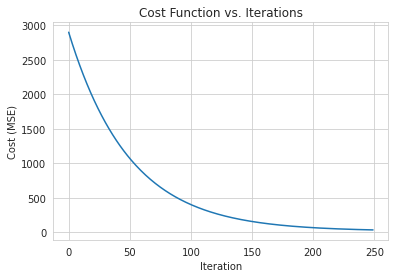

In [35]:
# plotting out cost function values at each iteration to visualise the decrease in costs

plt.plot(J_storage)
plt.title('Cost Function vs. Iterations')
plt.xlabel('Iteration')
plt.ylabel('Cost (MSE)')
plt.grid(True)
plt.show()

<div class="alert alert-block alert-info">
<b>Observation:</b> We can see that the cost decreases and reaches close to zero as number of iterations increase. This suggests that gradient descent is converging successfully, which means our algorithm is minimising the cost function (Mean Squared Error) and our β (coefficients) are becoming more accurate.
</div>

In [36]:
# now we perform a prediction using our trained linear regression model on the test dataset

pred = predict_linreg(df_features_test.to_numpy(), model['beta'], model['means'], model['stds'])

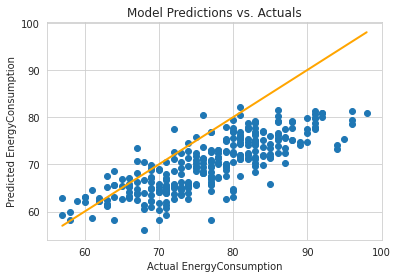

In [37]:
# plotting out our prediction to visualise how close we are to our actual values

plt.scatter(df_target_test, pred)
plt.xlabel("Actual EnergyConsumption")
plt.ylabel("Predicted EnergyConsumption")
plt.title("Model Predictions vs. Actuals")
plt.plot([df_target_test.min(), df_target_test.max()],
         [df_target_test.min(), df_target_test.max()],
         color="orange", lw=2)  # Line y=x for ideal predictions
plt.show()

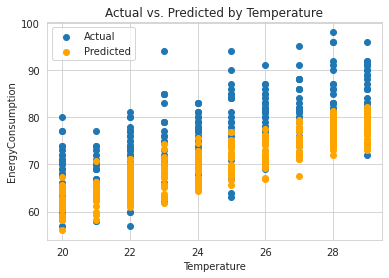

In [38]:
plt.scatter(df_features_test["Temperature"], df_target_test, label="Actual")
plt.scatter(df_features_test["Temperature"], pred, color="orange", label="Predicted")
plt.xlabel("Temperature")
plt.ylabel("EnergyConsumption")
plt.legend()
plt.title("Actual vs. Predicted by Temperature")
plt.show()

In [39]:
# numerical visualisation of our predictions compared with the actual values

print("Predictions:", pred[:10].ravel())
print("Actuals:    ", df_target_test.values[:10].ravel())

Predictions: [73.13028618 72.54509049 72.49105198 65.43931721 76.786299   66.92618343
 71.85955039 64.92995046 69.2602041  74.52431866]
Actuals:     [78 77 82 72 77 65 75 71 75 74]


### Evaluating the Model

- Describe the metrics of your choice
- Evaluate your model performance

### What metric did we choose?

Root Mean Squared Error (RMSE)

### How does our metric of choice work and why did we choose it?

It measures the average magnitude of the error between predicted values and actual values, with larger errors being penalised more heavily. To compute RMSE, we first calculate the difference between each predicted and actual value, square these differences to eliminate negative signs and emphasise larger errors, take the average of these squared values to get the Mean Squared Error, and finally take the square root of this average to bring the result back to the original unit of measurement.

RMSE is particularly useful because it gives a clear, interpretable measure of prediction accuracy in the same units as the target variable, allowing for meaningful comparison between models or over time. Moreover, RMSE emphasises large errors (implying bad prediction about high usage), making it a highly suitable metric to use as we care about large spikes or drops being wrong for our prediction.

In [40]:
# formula to get mean squared error (MSE)
def mean_squared_error(target, pred):
    return np.sum((target-pred)**2)/target.shape[0]

# our metric that we plan on using is the square root of MSE
def rmse(target, pred) -> float:
    return np.sqrt(mean_squared_error(target, pred))

In [41]:
target = df_target_test.to_numpy()
root_mean_squared_error = rmse(target, pred)
print(root_mean_squared_error)

8.366276858858544


<div class="alert alert-block alert-info">
<b>Conclusion:</b> Our multi-linear regression model that we used to predict energy consumption achieved a Root Mean Squared Error (RMSE) of approximately 8.37 on the test dataset. This means that, on average, the model predictions differ from the actual energy consumption values by about 8 units. There is clear room for improvement as  given that the mean energy consumption of our dataset is approximately 77.05, it suggests that our model predicts energy use with about 10.8% average error.
</div>

### Improving the Model

- Improve the models by performing any data processing techniques or hyperparameter tuning.
- You can repeat the steps above to show the improvement as compared to the previous performance

Note:
- You should not change or add dataset at this step
- You are allowed to use library such as sklearn for data processing (NOT for building model)
- Make sure to have the same test dataset so the results are comparable with the previous model 
- If you perform hyperparameter tuning, it will require you to split your training data further into train and validation dataset

<div class="alert alert-block alert-info">
<b>Improving the Model:</b> We decided to perform hyperparameter tuning to attempt to improve our model. We will first split our training data further into train and validation dataset before proceeding with the tuning. (A different random state seed will be used here to prevent any biasness resulting from the seed being the same as the original split of data.)
</div>

In [42]:
# further split training into train/validation for tuning
df_features_train_sub, df_features_val, df_target_train_sub, df_target_val = split_data(df_features_train, df_target_train, random_state=34, test_size=0.2)

# hyperparameter tuning grid
learning_rates = [0.001, 0.005, 0.01, 0.02, 0.03, 0.04, 0.05] # possible alpha value inputs
iterations_list = [250, 500, 1000, 1500, 2000, 2500, 3000] # possible iterations inputs

# setting up variables to store best result
best_val_rmse = float('inf')
best_params = None
best_model = None

# looping through each combination of learning rates and iterations
for lr in learning_rates:
    for iters in iterations_list:
        
        # train temporary multi-linear regression model
        model_tmp, J_storage_tmp = build_model_linreg(df_features_train_sub, df_target_train_sub, alpha=lr, iterations=iters)
        
        # make predictions based on this temporary model
        pred_val = predict_linreg(df_features_val.to_numpy(), model_tmp['beta'], model_tmp['means'], model_tmp['stds'])
        
        # calculate rmse (metric used to determine if this temporary model is better)
        val_rmse = rmse(df_target_val.to_numpy(), pred_val)
        
        # print out currently used learning rate, iterations and rmse for better visualisation when running code
        print(f"lr={lr}, iters={iters}, val_rmse={val_rmse:.4f}")
        
        # update best result if current rmse is lower than previous best rmse
        if val_rmse < best_val_rmse:
            best_val_rmse = val_rmse
            best_params = (lr, iters)
            best_model = model_tmp

# provide an output for the best result
print(f"\nBest params: learning rate={best_params[0]}, iterations={best_params[1]}")
print(f"Validation RMSE with best params: {best_val_rmse}")

# retrain model on full training data with the use of the best result
final_model, final_J_storage = build_model_linreg(df_features_train, df_target_train, alpha = best_params[0], iterations = best_params[1])

# get the predictions based on the original test data
pred_test = predict_linreg(df_features_test.to_numpy(), final_model['beta'], final_model['means'], final_model['stds'])

# output the new and improved rmse value
test_rmse = rmse(df_target_test.to_numpy(), pred_test)
print(f"\nTest RMSE: {test_rmse}")

lr=0.001, iters=250, val_rmse=59.0487
lr=0.001, iters=500, val_rmse=46.1724
lr=0.001, iters=1000, val_rmse=28.4558
lr=0.001, iters=1500, val_rmse=17.9353
lr=0.001, iters=2000, val_rmse=11.8776
lr=0.001, iters=2500, val_rmse=8.6017
lr=0.001, iters=3000, val_rmse=6.9935
lr=0.005, iters=250, val_rmse=22.4467
lr=0.005, iters=500, val_rmse=8.5788
lr=0.005, iters=1000, val_rmse=5.8134
lr=0.005, iters=1500, val_rmse=5.7753
lr=0.005, iters=2000, val_rmse=5.7738
lr=0.005, iters=2500, val_rmse=5.7737
lr=0.005, iters=3000, val_rmse=5.7737
lr=0.01, iters=250, val_rmse=8.5502
lr=0.01, iters=500, val_rmse=5.8126
lr=0.01, iters=1000, val_rmse=5.7738
lr=0.01, iters=1500, val_rmse=5.7737
lr=0.01, iters=2000, val_rmse=5.7737
lr=0.01, iters=2500, val_rmse=5.7737
lr=0.01, iters=3000, val_rmse=5.7737
lr=0.02, iters=250, val_rmse=5.8111
lr=0.02, iters=500, val_rmse=5.7738
lr=0.02, iters=1000, val_rmse=5.7737
lr=0.02, iters=1500, val_rmse=5.7737
lr=0.02, iters=2000, val_rmse=5.7737
lr=0.02, iters=2500, val_r

<div class="alert alert-block alert-info">
<b>Conclusion:</b>
<br>
Hyperparameter tuning involves adjusting how quickly and how many times the model learns from the data. We tested different combinations of alpha and iterations to find the best learning settings through trial and error using part of the training data for validation. The goal was to find a balance where the model learns enough to make accurate predictions without overfitting.
<br><br>
After getting the best settings, the model was retrained on the full training dataset and we tested it again. The final result (RSME) improved from 8.37 to 5.05, which is quite a good improvement. Every decrease in RMSE can translate to better decision-making when applied at scale, enabling more precise forecasts and targeted energy-saving strategies. This improvement demonstrates the value of hyperparameter tuning and validates the robustness of our approach, reinforcing confidence in the model’s practical usefulness for guiding sustainable energy management at the household level.
</div>

### Exporting learned parameters for streamlit real-time predictions

In [43]:
np.savez("multiRegressionModel.npz",
         beta=final_model['beta'],
         means=final_model['means'],
         stds=final_model['stds'],
         feature_columns=np.array(df_features_train.columns)
        )

### Discussion and Analysis

- Analyze the results of your metrics.
- Explain how does your analysis and machine learning help to solve your problem statement.
- Conclusion

### Analysis of results of metrics

We evaluated the performance of our predictive model using Root Mean Squared Error (RMSE). The final RMSE achieved is approximately 5.05, which means the model’s predictions for energy consumption were, on average, about 5 units away from the actual values. This error is considered reasonably low given the range of values in our dataset, suggesting that the model is capable of making fairly accurate predictions. Throughout the modelling process, we also observed how changes in training settings (such as learning rate and number of iterations) affected the model’s accuracy, and we used this feedback to fine-tune our model for better performance by aiming to achieve a lower RSME.

###  How does our analysis and machine learning help solve our problem statement?

Our analysis uses multi-linear regression to uncover the key factors influencing household energy consumption, such as temperature, humidity, square footage, occupancy, HVAC and lighting usage, and renewable energy input. By modelling these relationships, we can predict future energy consumption under varying conditions and behaviours. This predictive capability allows us to identify which variables most significantly impact usage, offering actionable insights for energy-saving strategies at the household level. We use **Root Mean Squared Error (RMSE)** to evaluate our model’s performance, as it provides a clear measure of how close our predictions are to actual energy usage. A lower RMSE indicates a more accurate and reliable model, ensuring that our recommendations are based on trustworthy estimates. Ultimately, our machine learning model supports smarter, data-driven decisions for reducing household energy consumption and promoting more sustainable living habits.

### Conclusion

Through the use of multiple linear regression, we managed to use our household-level data to predict energy consumption with a reasonable degree of accuracy. By carefully preprocessing the data, tuning model parameters, and evaluating performance using Root Mean Squared Error (RMSE), we were able to build a model that is able to provide  reliable predictions. This predictive capability directly supports the goal of using data to inform energy-saving strategies, which is able to support data-driven decisions aimed at improving household energy efficiency.